# Classification

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Load the data
data_url = "https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/STATS201_Aida_Final_Project/main/data/Queried_data/owid-energy-data.csv"
df = pd.read_csv(data_url)

In [3]:
# Define criteria for energy efficiency levels
threshold_high_renewable = 8.925  # Cited source
threshold_low_intensity = 0.44    # Cited source

In [4]:
# Create the dependent variable based on the criteria
df['energy_efficiency'] = 'Medium'  # Default to Medium
df.loc[(df['renewables_share_elec'] > threshold_high_renewable) & (df['energy_per_gdp'] < threshold_low_intensity), 'energy_efficiency'] = 'High'
df.loc[(df['renewables_share_elec'] <= threshold_high_renewable) & (df['energy_per_gdp'] >= threshold_low_intensity), 'energy_efficiency'] = 'Low'

In [5]:
# Explore the distribution of the created variable
print(df['energy_efficiency'].value_counts())

Medium    19973
Low        1430
High        187
Name: energy_efficiency, dtype: int64


In [6]:
# Drop rows with missing values
df_cleaned = df.dropna(subset=['renewables_share_elec', 'energy_per_gdp', 'energy_efficiency'])

# Define dependent and independent variables
X = df_cleaned[['renewables_share_elec', 'energy_per_gdp']]
y = df_cleaned['energy_efficiency']

In [7]:
# Establish the dependent variable based on predefined criteria
# You might need to replace the threshold values with the appropriate ones
y.replace(to_replace={0: 'Low', 1: 'Medium', 2: 'High'}, inplace=True)

<ipython-input-7-4266bae6ee4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace(to_replace={0: 'Low', 1: 'Medium', 2: 'High'}, inplace=True)


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification model: Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
print("Random forest accuracy:", accuracy_score(y_test, y_pred))

Random forest accuracy: 0.9987834549878345


As this model may lead to some overfitting, as Random Forests can be prone to overfitting, to tackle this issue, I'll tune the hyperparameter `max_depth`.

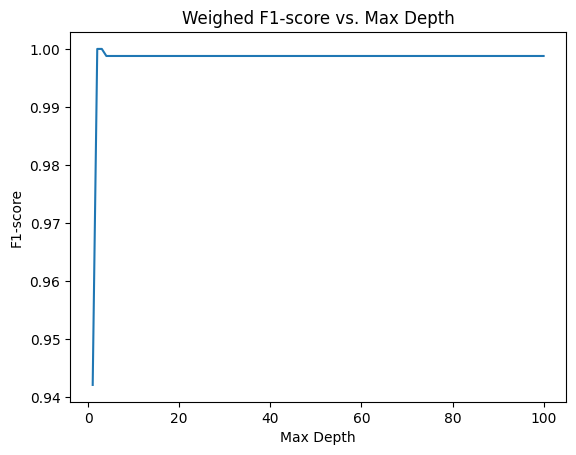

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

# Lists to store max_depth and F1-score
max_depth_values = []
f1_scores = []

# Loop through varying max_depth from 1 to 100
for max_depth in range(1, 101):
    # Create a pipeline with CountVectorizer and DecisionTreeClassifier with varying max_depth
    pipeline_depth = Pipeline([
        ('clf', RandomForestClassifier(max_depth = max_depth, random_state = 42))
    ])

    # Train the model and predict y_pred_depth
    pipeline_depth.fit(X_train, y_train)
    y_pred_depth = pipeline_depth.predict(X_test)

    # Calculate weighted F1-score
    weighted_f1_depth = f1_score(y_test, y_pred_depth, average = "weighted")

    # Append max_depth and F1-score to previously created lists
    max_depth_values.append(max_depth)
    f1_scores.append(weighted_f1_depth)

# Plot F1-score against max_depth
plt.plot(max_depth_values, f1_scores)
plt.title('Weighed F1-score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1-score')
plt.show()

In [26]:
clf = RandomForestClassifier(max_depth= 5, random_state=42)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Random forest accuracy:", accuracy_score(y_test, predicted))


Random forest accuracy: 0.9987834549878345


## Model Evaluation

In [20]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        28
         Low       1.00      1.00      1.00       274
      Medium       1.00      1.00      1.00       520

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822



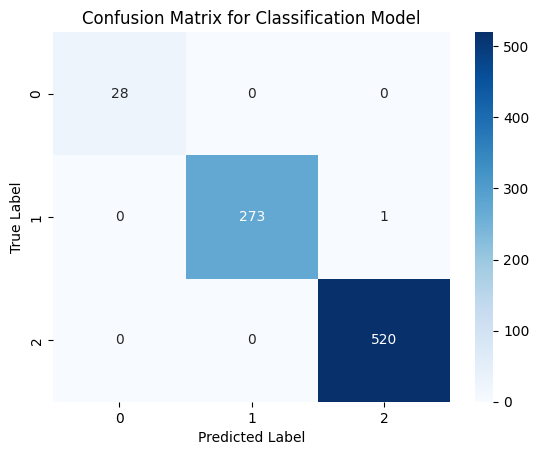

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Classification Model')
# Save the figure
plt.savefig('classification_confusion_matrix.png')
plt.show()

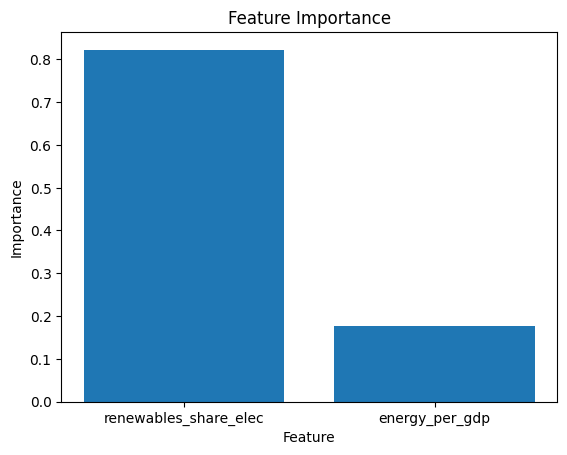

In [22]:
# Feature importance
feature_importance = rf_classifier.feature_importances_
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
# Save the figure
plt.savefig('classification_feature_importance.png')
plt.show()

In [23]:
print(accuracy_score(y_test, y_pred))

0.9987834549878345


Reasons for perfect score:

Class Imbalance: If the dataset is heavily imbalanced, with one class vastly outnumbering the others, a classifier might simply predict the majority class for every instance and still achieve high accuracy.

Trying simpler models:

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
predicted = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predicted)
print("Decision Tree accuracy:", accuracy)


Decision Tree accuracy: 1.0


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic Regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
predicted = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predicted)
print("Logistic Regression accuracy:", accuracy)


Logistic Regression accuracy: 0.9829683698296837


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict on the test set
predicted = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predicted)
print("Naive Bayes accuracy:", accuracy)


Naive Bayes accuracy: 0.9562043795620438


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation
# Here, we use 5-fold cross-validation (k=5)
# You can adjust the number of folds as needed
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)


Cross-Validation Scores: [0.99635036 0.99634592 1.         1.         1.        ]
Mean Accuracy: 0.998539256914747


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict probabilities for the test set
probs = clf.predict_proba(X_test)

# Calculate the AUC-ROC score using One-vs-Rest strategy
auc_roc_score = roc_auc_score(y_test, probs, multi_class='ovr')
print("AUC-ROC Score:", auc_roc_score)


AUC-ROC Score: 0.99999778002735


* High Predictive Power: The model has learned to capture the underlying patterns and relationships in the data effectively, allowing it to make accurate predictions.
* Good Generalization: The model's performance on unseen data (as estimated by cross-validation) is very close to its performance on the training data. This indicates that the model has not overfit to the training data and is generalizing well.
* Data Quality: Perfect or near-perfect scores might indicate that the data is of high quality, with clear and distinct patterns that the model can easily learn.
* Appropriate Model Choice: The chosen model and its hyperparameters seem to be appropriate for the given task and dataset.
* Potential Data Leakage: While perfect scores can indicate a well-performing model, they can also be a sign of data leakage if there's a mistake in the preprocessing or modeling pipeline that inadvertently allows the model to see information from the test set during training.
* Evaluation Metric Choice: It's essential to ensure that the evaluation metric used is appropriate for the task. If the task is imbalanced or has other specific characteristics, using metrics like F1 score, precision, recall, or area under the ROC curve (AUC-ROC) might provide a more comprehensive assessment of the model's performance.

Bias in the scores to divide the classification

## More Visualizations

<ipython-input-35-f1c08f65e33a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='energy_efficiency', data=df, palette='pastel')


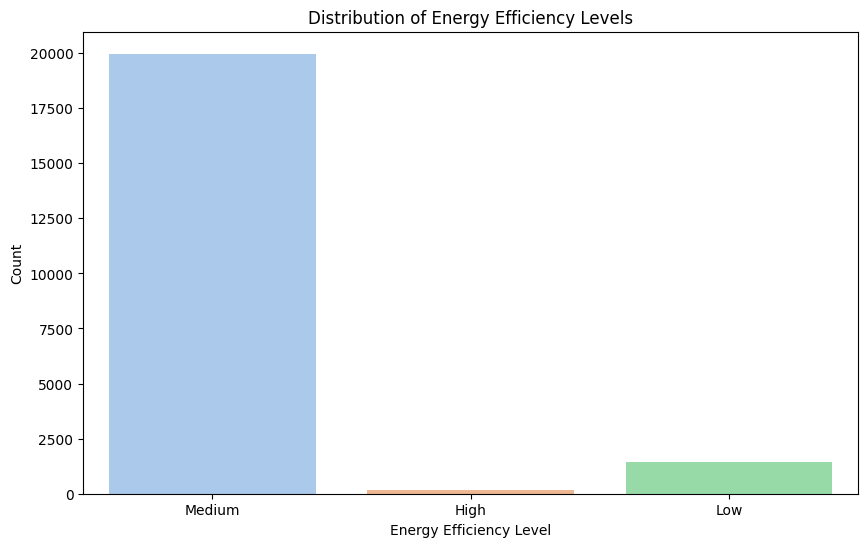

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='energy_efficiency', data=df, palette='pastel')
plt.title('Distribution of Energy Efficiency Levels')
plt.xlabel('Energy Efficiency Level')
plt.ylabel('Count')
# Save the figure
plt.savefig('classification_distribution_energy.png')
plt.show()


<ipython-input-36-f270b4cd311a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='energy_efficiency', y='renewables_share_elec', data=df, palette='pastel')


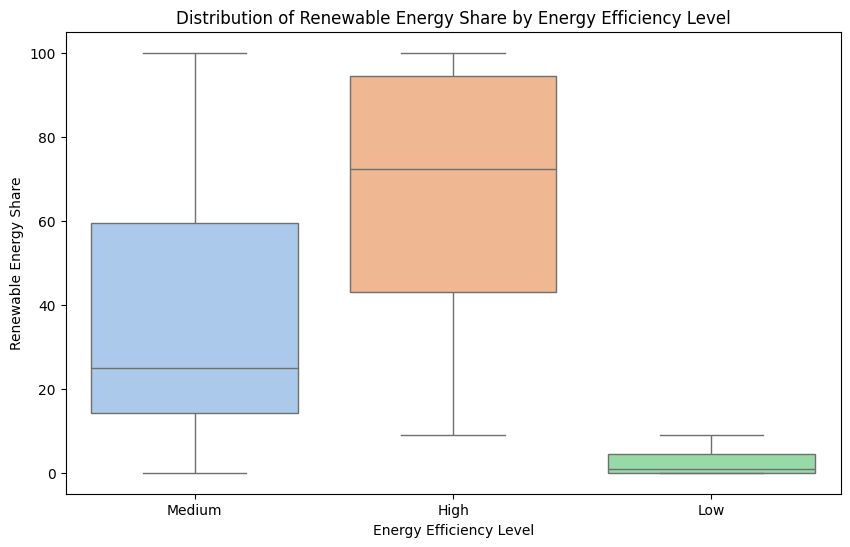

<ipython-input-36-f270b4cd311a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='energy_efficiency', y='energy_per_gdp', data=df, palette='pastel')


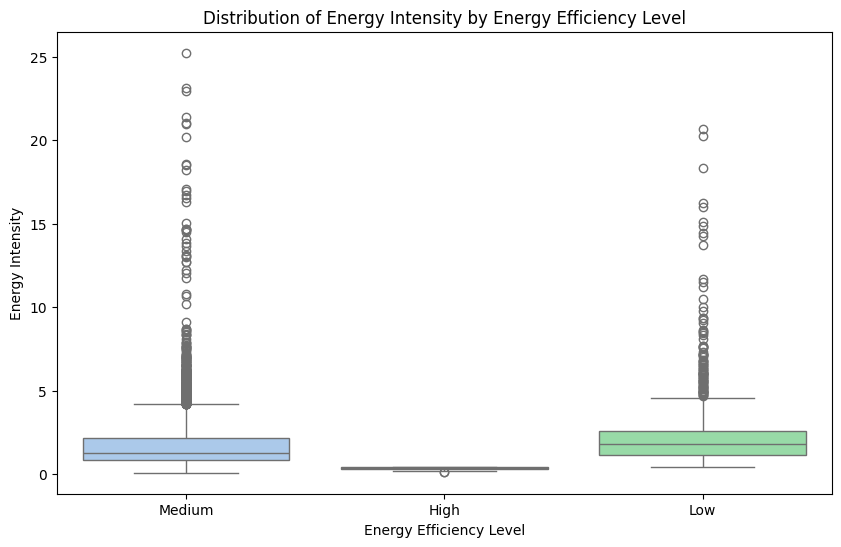

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='energy_efficiency', y='renewables_share_elec', data=df, palette='pastel')
plt.title('Distribution of Renewable Energy Share by Energy Efficiency Level')
plt.xlabel('Energy Efficiency Level')
plt.ylabel('Renewable Energy Share')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='energy_efficiency', y='energy_per_gdp', data=df, palette='pastel')
plt.title('Distribution of Energy Intensity by Energy Efficiency Level')
plt.xlabel('Energy Efficiency Level')
plt.ylabel('Energy Intensity')
# Save the figure
plt.savefig('classification_boxplot_distribution_energy.png')
plt.show()
